In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import pandas as pd
import numpy as np

In [18]:
image = plt.imread(r'C:\Users\Mazz Mirza\Python\1.jpg')

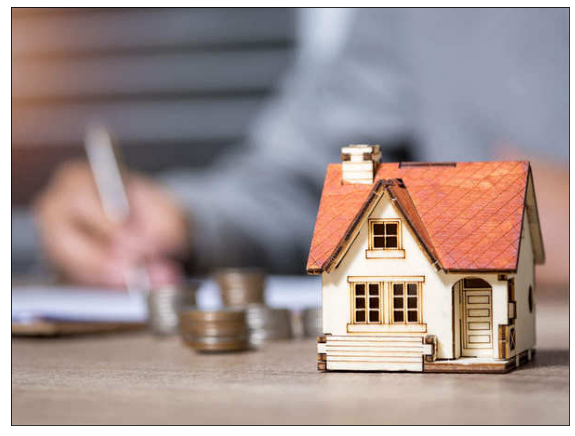

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

#                          HOUSE PRICE PREDICTION

In [25]:
data = pd.read_csv("C:\\Users\\Mazz Mirza\\Mazz\\Study\\Datasets\\king_country_houses.csv")

In [26]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [28]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
data.loc[(data.bedrooms==0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


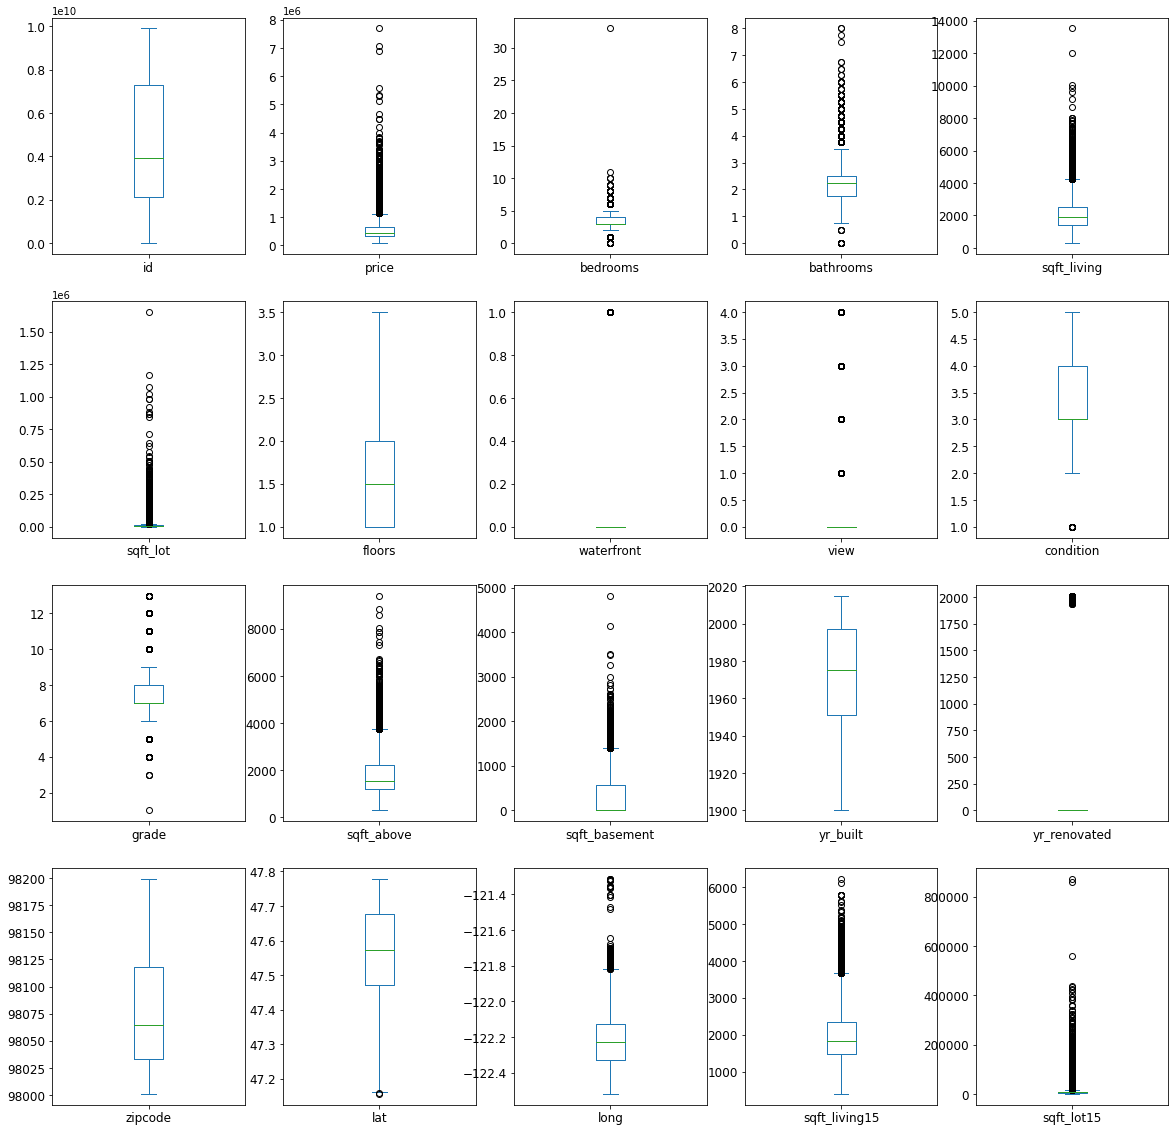

In [30]:
data.plot(kind = 'box',subplots = True,layout = (4,5),fontsize = 12,figsize = (20,20))
plt.show()

In [35]:
data['date'] = pd.to_datetime(data['date'])

In [36]:
data['month'] = data['date'].apply(lambda a: a.month)

In [37]:
data['year'] = data['date'].apply(lambda a:a.year)

In [38]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [39]:
data.drop(['id','zipcode','date'],axis=1,inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [31]:
import seaborn as sns

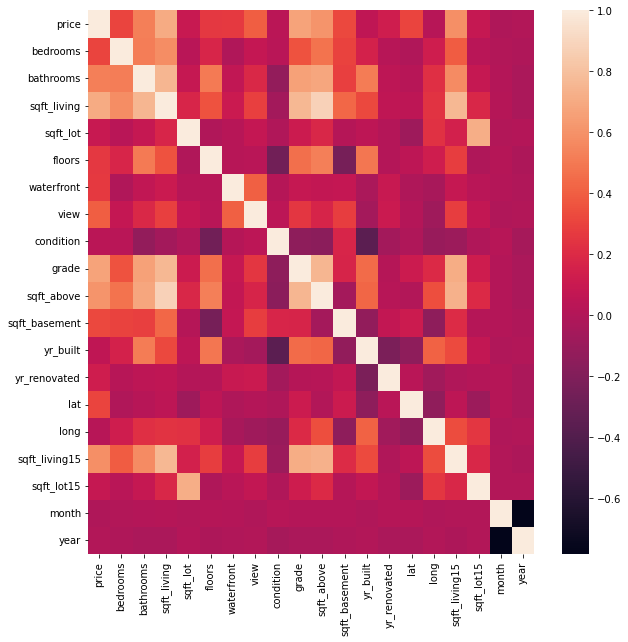

In [40]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [41]:
X = data.drop('price',axis=1)
y = data['price']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [46]:
#Normalizing or scaling the data
from sklearn.preprocessing import MinMaxScaler
normal = MinMaxScaler()

In [47]:
X_train = normal.fit_transform(X_train)
X_test = normal.fit_transform(X_test)

In [52]:
model = keras.Sequential()
model.add(keras.layers.Dense(19, activation='relu')) #Input Layer
model.add(keras.layers.Dense(10, activation='relu')) #Hidden layer 1
model.add(keras.layers.Dense(19, activation='relu')) #Hidden layer 2
model.add(keras.layers.Dense(1)) # output layer no need for activation as its regression problem

In [53]:
model.compile(optimizer='adam',loss='mse',metrics='accuracy')

In [54]:
model.fit(X_train,y_train.values,validation_data=(X_test,y_test.values),epochs= 100,batch_size=256)

Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 424137261056.0000 - accuracy: 0.0000e+00 - val_loss: 433464999936.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 424127660032.0000 - accuracy: 0.0000e+00 - val_loss: 433441931264.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 424077950976.0000 - accuracy: 0.0000e+00 - val_loss: 433341759488.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 423905263616.0000 - accuracy: 0.0000e+00 - val_loss: 433040195584.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 423467745280.0000 - accuracy: 0.0000e+00 - val_loss: 432357539840.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 422551814144.0000 - accuracy: 0.0000e+00 - val_loss: 431013396480.0000 -

Epoch 49/100
64/64 [==============================] - 0s 2ms/step - loss: 93514178560.0000 - accuracy: 0.0000e+00 - val_loss: 93758300160.0000 - val_accuracy: 0.0000e+00
Epoch 50/100
64/64 [==============================] - 0s 2ms/step - loss: 93154017280.0000 - accuracy: 0.0000e+00 - val_loss: 93350420480.0000 - val_accuracy: 0.0000e+00
Epoch 51/100
64/64 [==============================] - 0s 2ms/step - loss: 92784885760.0000 - accuracy: 0.0000e+00 - val_loss: 92954566656.0000 - val_accuracy: 0.0000e+00
Epoch 52/100
64/64 [==============================] - 0s 3ms/step - loss: 92413042688.0000 - accuracy: 0.0000e+00 - val_loss: 92547760128.0000 - val_accuracy: 0.0000e+00
Epoch 53/100
64/64 [==============================] - 0s 3ms/step - loss: 92041560064.0000 - accuracy: 0.0000e+00 - val_loss: 92102844416.0000 - val_accuracy: 0.0000e+00
Epoch 54/100
64/64 [==============================] - 0s 3ms/step - loss: 91651506176.0000 - accuracy: 0.0000e+00 - val_loss: 91742986240.0000 - val_a

64/64 [==============================] - 0s 3ms/step - loss: 69180760064.0000 - accuracy: 0.0000e+00 - val_loss: 66456129536.0000 - val_accuracy: 0.0000e+00
Epoch 98/100
64/64 [==============================] - 0s 3ms/step - loss: 68561629184.0000 - accuracy: 0.0000e+00 - val_loss: 65795538944.0000 - val_accuracy: 0.0000e+00
Epoch 99/100
64/64 [==============================] - 0s 3ms/step - loss: 67943620608.0000 - accuracy: 0.0000e+00 - val_loss: 65154019328.0000 - val_accuracy: 0.0000e+00
Epoch 100/100
64/64 [==============================] - 0s 3ms/step - loss: 67318583296.0000 - accuracy: 0.0000e+00 - val_loss: 64474488832.0000 - val_accuracy: 0.0000e+00


In [55]:
y_pred = model.predict(X_test)

169/169 [==============================] - 0s 1ms/step


In [56]:
from numpy import sqrt 
sqrt(np.mean(y_pred - y_test.values)**2) #RMSE and MSE should be as low as possible

38294.05183371114

In [57]:
from sklearn.metrics import explained_variance_score,r2_score

In [58]:
explained_variance_score(y_test,y_pred) # similar to R2  

0.5448114639143318

In [59]:
r2_score(y_test,y_pred)
#Not good, need to remove unnecessary variables as well outliers should be treated in a better way

0.5342175130016085